In [1]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties.umath import *

In [2]:
#Reading data

zero = pd.read_excel('data/0.xlsx')
five = pd.read_excel('data/5.xlsx')
ten = pd.read_excel('data/10.xlsx')
fifteen = pd.read_excel('data/15.xlsx')
alpha = pd.read_excel('data/alpha.xlsx')
int = pd.read_excel('data/int.xlsx')

out = pd.read_excel('data/out.xlsx')

print(zero)

     c       n
0 -0.1  1.3319
1 -0.1  1.3319
2 -0.1  1.3319


In [3]:
# Constants and values

d = 0.01 #dm

A_c = ufloat(0.0014, 0.00003)
n_v = ufloat(1.333, 0.0003)

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.99)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

In [4]:
# Calculation 

zero_c = ufloat(np.mean(zero['c']), uncert(zero['c'], 0.025))
zero_n = ufloat(np.mean(zero['n']), uncert(zero['n'], 0.0001))
five_c = ufloat(np.mean(five['c']), uncert(five['c'], 0.025))
five_n = ufloat(np.mean(five['n']), uncert(five['n'], 0.0001))
ten_c = ufloat(np.mean(ten['c']), uncert(ten['c'], 0.025))
ten_n = ufloat(np.mean(ten['n']), uncert(ten['n'], 0.0001))
fifteen_c = ufloat(np.mean(fifteen['c']), uncert(fifteen['c'], 0.025))
fifteen_n = ufloat(np.mean(fifteen['n']), uncert(fifteen['n'], 0.0001))

c_list = [zero_c, five_c, ten_c, fifteen_c]
n_list = [zero_n, five_n, ten_n, fifteen_n]

out['c'] = c_list 
out['n'] = n_list

alpha_0 = ufloat(np.mean(alpha['alpha_0']), uncert(alpha['alpha_0'], 0.01))
alpha_5 = ufloat(np.mean(alpha['alpha_1']), uncert(alpha['alpha_1'], 0.01))
alpha_10 = ufloat(np.mean(alpha['alpha_2']), uncert(alpha['alpha_2'], 0.01))
alpha_15 = ufloat(np.mean(alpha['alpha_3']), uncert(alpha['alpha_3'], 0.01))

alpha_list = [alpha_0, alpha_5, alpha_10, alpha_15]

out['alpha'] = alpha_list
out['alpha_corr'] = out['alpha'] - out['alpha'][0]

out['c_corr'] = out['c'] - out['c'][0]
out['c_corr'][0] = ufloat(-0.1, 0.025)
out['alpha_corr'][0] = ufloat(-0.05, 0.01)
 
out['alpha_prime'] = out['alpha_corr'] / (d*out['c_corr'])

print(out) 

I_max = ufloat(np.max(int['I']), 0.01)
I_min = ufloat(np.min(int['I']), 0.01)

V = (I_max - I_min) / (I_max + I_min)
print('\nV = ', V)

              c                n         alpha      alpha_corr  \
0  -0.10+/-0.25  1.3319+/-0.0010  -0.05+/-0.05  -0.050+/-0.010   
1   4.10+/-0.25  1.3386+/-0.0019   3.08+/-0.07     3.13+/-0.08   
2     7.8+/-0.4  1.3461+/-0.0010   6.27+/-0.16     6.32+/-0.17   
3    14.2+/-0.4  1.3542+/-0.0010  10.15+/-0.14    10.20+/-0.15   

           c_corr alpha_prime  
0  -0.100+/-0.025     50+/-16  
1     4.20+/-0.35      75+/-7  
2       7.9+/-0.4      80+/-5  
3      14.3+/-0.4  71.5+/-2.4  

V =  0.878+/-0.023


In [5]:
#Linear fitting

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(out['c'].apply(lambda x: x.nominal_value), out['n'].apply(lambda x: x.nominal_value))
A_fit_1 = ufloat(slope, std_err)
n_0_fit = ufloat(intercept, std_err)
print('A = ', A_fit_1)
print('n_0 = ', n_0_fit)

#Best fit line
best_fit_line = slope * np.array(out['c'].apply(lambda x: x.nominal_value)) + intercept

A =  0.00158+/-0.00010
n_0 =  1.33241+/-0.00010


In [9]:
#Calculation of concentration

out['c_calc'] = (out['n'] - n_v) / A_c
print(out['c_calc'])

0    -0.8+/-0.7
1     4.0+/-1.4
2     9.3+/-0.8
3    15.1+/-0.8
Name: c_calc, dtype: object


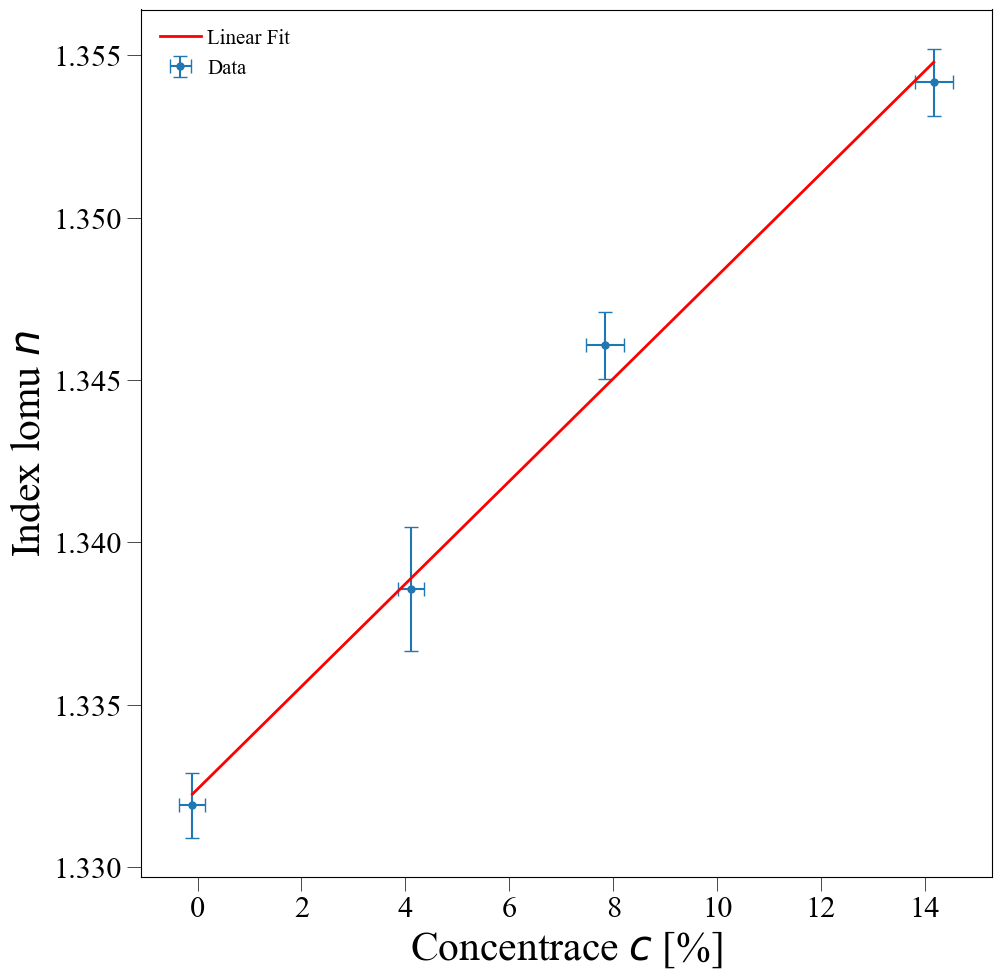

In [7]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"Concentrace $c$ [%]")
ax.xaxis.label.set_fontsize(30)
ax.set_ylabel(r"Index lomu $n$")
ax.yaxis.label.set_fontsize(30)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=22)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=22)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.errorbar(out['c'].apply(lambda x: x.nominal_value), out['n'].apply(lambda x: x.nominal_value), xerr=out['c'].apply(lambda x: x.std_dev), yerr=out['n'].apply(lambda x: x.std_dev), fmt='o', color=colors[5], markersize=5, capsize=5, label='Data')
ax.plot(out['c'].apply(lambda x: x.nominal_value), best_fit_line, color='red', linewidth=2, label='Linear Fit')


# ax.plot()

handles, labels = ax.get_legend_handles_labels()
order = [0, 1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/lom.png', bbox_inches='tight')

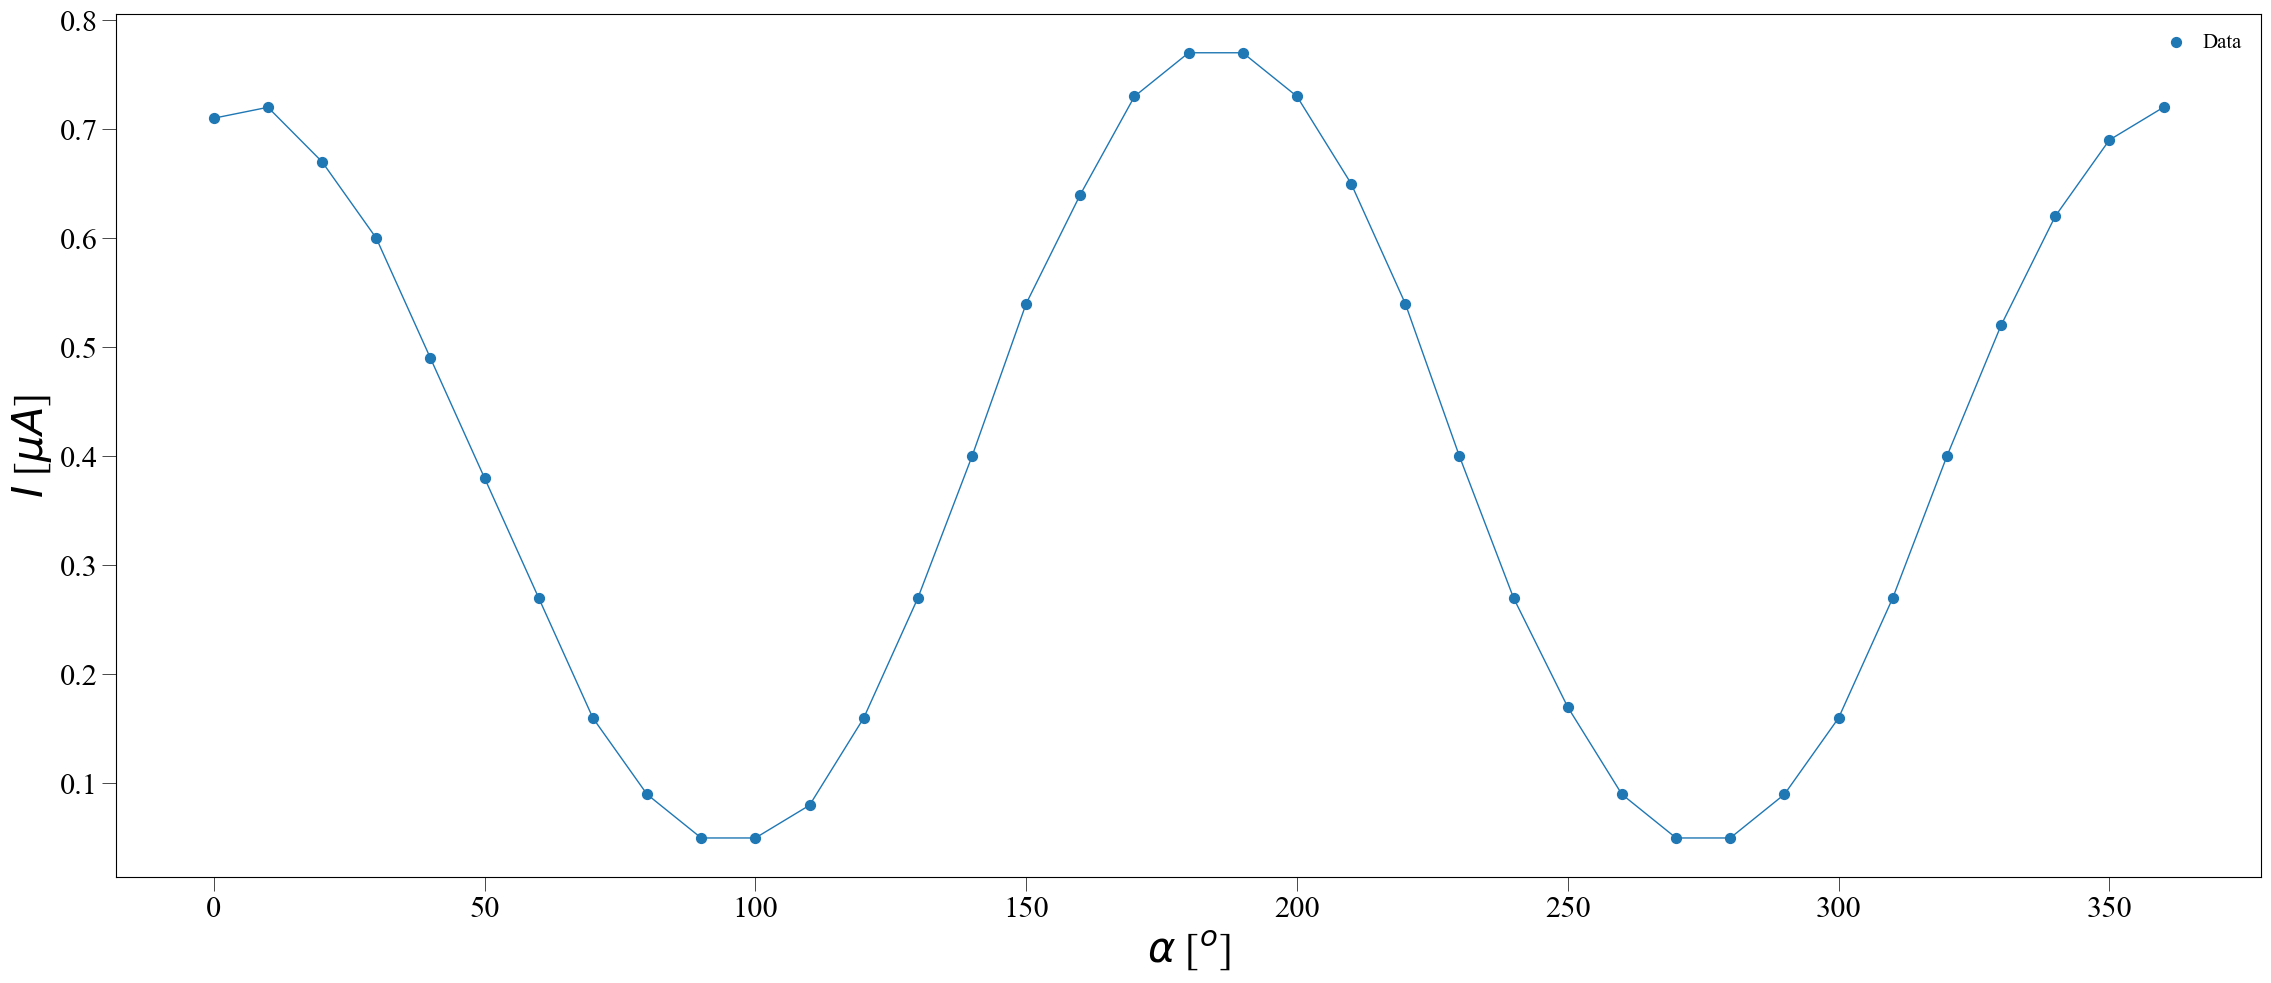

In [8]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(23, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\alpha$ [$^o$]")
ax.xaxis.label.set_fontsize(30)
ax.set_ylabel(r"$I$ [$\mu A$]")
ax.yaxis.label.set_fontsize(30)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=22)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=22)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(int['alpha'], int['I'], color=colors[5], label='Data', marker='o', s=50)
ax.plot(int['alpha'], int['I'], color=colors[5], linewidth=1)


handles, labels = ax.get_legend_handles_labels()
order = [0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/intens.png', bbox_inches='tight')